In [234]:
import pymysql
from sklearn.linear_model import ElasticNet,Lasso,Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline

connect = pymysql.connect(host='127.0.0.1',user = 'root',password='', db='arragement', charset='utf8')
cur = connect.cursor()
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### slot

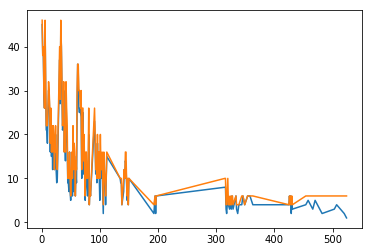

In [235]:
sql = "select lesson_id, sum(max_student), sum(actual_student)  from lesson_distribute where begin_at = '2018-01-24 19:20:00'  group by lesson_id order by lesson_id;"
cur.execute(sql)
data = cur.fetchall()
X = np.array([i[0] for i in data ])
y = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(X,y,label="actual")
plt.plot(X,ym,label="max")
plt.show()

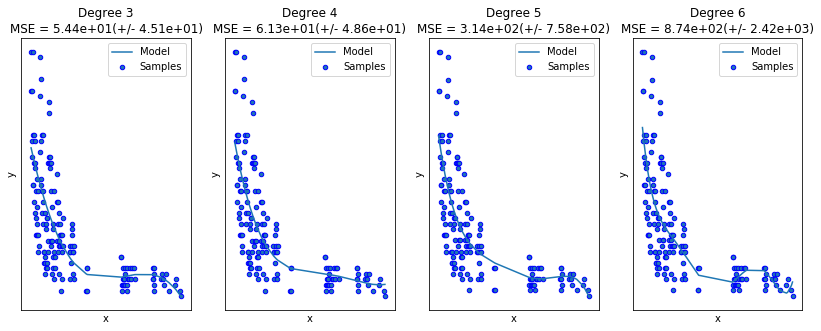

In [236]:
from sklearn.externals import joblib
n_samples = 30
degrees = [ 3, 4, 5 , 6]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
   
    #joblib.dump(pipeline, 'sch_%d.pkl' % i)
    #clf = joblib.load('filename.pkl') 

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 160)
    plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

#### day

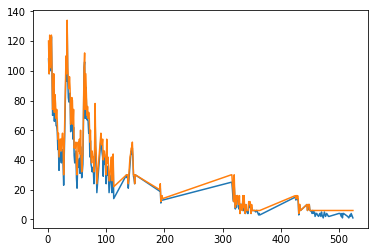

In [237]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y-%m-%d') = '2018-01-24'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

#### week

ValueError: x and y must have same first dimension, but have shapes (222,) and (327,)

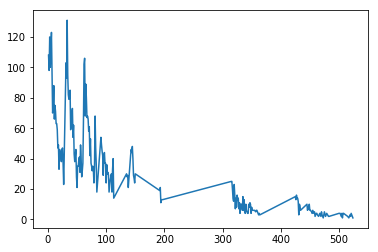

In [238]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where begin_at between '2018-01-22' and '2018-01-29' group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
X = np.array([i[0] for i in data ])
y = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

In [ ]:
degrees = [ 3, 4, 5 , 6]
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
   
    joblib.dump(pipeline, 'week_%d.pkl' % degrees[i])
    #clf = joblib.load('filename.pkl') 

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 160)
    plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y-%m') = '2018-01'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

In [ ]:
model = make_pipeline(PolynomialFeatures(2), Lasso())
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

In [ ]:
np.mean(ya)

In [ ]:
np.sum(ya)

In [ ]:
sql = "select lesson_id, sum(max_student),sum(actual_student) from lesson_distribute where date_format(begin_at, '%Y') = '2018'  group by lesson_id order by lesson_id; "
cur.execute(sql)
data = cur.fetchall()
x = np.array([i[0] for i in data ])
ya = np.array([i[2] for i in data ])
ym = np.array([i[1] for i in data ])
plt.plot(x,ya,label="actual")
plt.plot(x,ym,label="max")
plt.show()

线性回归

In [ ]:
model = linear_model.LinearRegression()
Xi = x.reshape(-1,1)
Yi = ya.reshape(-1,1)
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

In [ ]:

from sklearn.preprocessing import PolynomialFeatures

model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(PolynomialFeatures(2), ElasticNet())
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet,Lasso
model = make_pipeline(PolynomialFeatures(2), Lasso())
model.fit(Xi, Yi)
y_plot = model.predict(Xi)
plt.scatter(Xi, Yi, color='red',label="样本数据",linewidth=2)
plt.plot(Xi, y_plot, color='green',label="拟合直线",linewidth=2)
plt.legend(loc='lower right')
plt.show()

上课人数概率密度
[13192,13362,13759, 14105, 12528,12610, 11707]
[1852, 2444, 2402, 2320, 2099, 16126, 21406, 22661, 19949] T

In [ ]:
days = np.array([13192,13362,13759, 14105, 12528,12610, 11707])
slots = np.array([1852, 2444, 2402, 2320, 2099, 16126, 21408, 22663, 19949])

In [ ]:
total = (np.sum(days)+ np.sum(slots)) / 2
model = np.dot(slots.reshape(9,-1)/total, days.reshape(1,7)/total)

In [ ]:
np.dot(model, lesson.reshape(1,9))

In [ ]:
output = np.array([200* model, 234*model])

##### MODEL

In [241]:
np.arange(63).reshape(9,7)

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48],
       [49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62]])

In [243]:
basemodel = np.array([54,62,55,56, 1,9, 17,25, 33,41,42, 50, 58, 3, 11, 19,27,28, 36, 44, 52, 60, 5, 13, 14, 22, 30, 38, 46, 39, 47,
        40, 48, 49,57,2,10,18,26,34,35,43,51,59,4,12,20,21,29,37,45,53,61,6,7,15,23,31,24,32,0,8,16])

In [244]:
basemodel

array([54, 62, 55, 56,  1,  9, 17, 25, 33, 41, 42, 50, 58,  3, 11, 19, 27,
       28, 36, 44, 52, 60,  5, 13, 14, 22, 30, 38, 46, 39, 47, 40, 48, 49,
       57,  2, 10, 18, 26, 34, 35, 43, 51, 59,  4, 12, 20, 21, 29, 37, 45,
       53, 61,  6,  7, 15, 23, 31, 24, 32,  0,  8, 16])

#### 9*7 63slots 全排

In [246]:
l = list()
for i in basemodel:
    temp = np.zeros(63)
    temp[i] = 1
    l.append(temp.reshape(9,7))
unit = np.array(l)